## Enhanced Fraud Detection System Model for E-Commerce and Banking Transactions Using Machine Learning
## Overview
This challenge focuses on building robust machine learning models for fraud detection in e-commerce and banking transactions. The project will involve analyzing, preprocessing, and integrating transaction data from both domains, engineering fraud-related features, and training multiple machine learning and deep learning models to detect fraudulent activity. The challenge also includes using geolocation and transaction pattern analysis to improve detection accuracy.

Participants will develop real-time fraud detection systems, ensuring efficiency and scalability in deployment. The project aims to deliver a fully operational fraud detection pipeline that includes model explainability, API deployment, and interactive dashboards.

## Objective
The primary objective of this challenge is to improve the detection of fraud cases in e-commerce and bank credit transactions by:

- Developing machine learning models to identify fraudulent patterns in both e-commerce and credit card transactions.
- Implementing geolocation analysis using IP address mappings and transaction pattern recognition.
- Enhancing model explainability through tools like SHAP and LIME for transparency in fraud detection.
- Deploying models in real-time using Flask, Docker, and developing APIs for serving fraud predictions.
- Creating an interactive dashboard with Dash to visualize fraud trends, fraud hotspots, and summary insights from transaction data.

## 1. Data Colllection

### Import Necessary Library

In [14]:
import os
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, classification_report

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Flatten

### Load Dataset

In [16]:
fraud_data = pd.read_csv("../data/Fraud_cleaned_Data.csv")
fraud_data.head()

,purchase_value,age,ip_address,class,frequency,velocity,hour_of_day,day_of_week,time_diff,signup_hour,signup_day_of_week,purchase_day_of_week,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
0,0.172414,0.362069,0.170603,0,1,34,0.086957,0.833333,4506682.0,22,1,5,False,True,False,False,False,False,True
1,0.048276,0.603448,0.081554,0,1,16,0.043478,0.000000,17944.0,20,6,0,False,False,False,False,False,False,False
2,0.041379,0.603448,0.610371,1,1,15,0.782609,0.500000,1.0,18,3,3,False,True,False,False,True,False,True
3,0.241379,0.396552,0.894219,0,1,44,0.565217,0.000000,492085.0,21,1,0,False,True,False,False,False,True,True
4,0.206897,0.465517,0.096752,0,1,39,0.782609,0.333333,4361461.0,7,1,2,False,False,False,False,False,True,True


In [17]:
creditcard_data = pd.read_csv("../data/creditcard.csv")
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Train test split

#### 2.1 Separet dependant and independant feature

In [18]:
# For Credit Card Data
X_creditcard = creditcard_data.drop(columns=['Class'])  # independant Features
y_creditcard = creditcard_data['Class']                   # Target variable

# For Fraud Data
X_fraud = fraud_data.drop(columns=['class'])  # independant Features
y_fraud = fraud_data['class']      # Target variable


### 2.2 trian test split by 80/20 percent

In [19]:
# Train-test split for Credit Card Data
X_train_creditcard, X_test_creditcard, y_train_creditcard, y_test_creditcard = train_test_split(
    X_creditcard, y_creditcard, test_size=0.2, random_state=42, stratify=y_creditcard
)

# Train-test split for Fraud Data
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(
    X_fraud, y_fraud, test_size=0.2, random_state=42, stratify=y_fraud
)

In [20]:
print(y_train_fraud.value_counts())
print(y_train_creditcard.value_counts())

class
0    109568
1     11321
Name: count, dtype: int64
Class
0    227451
1       394
Name: count, dtype: int64


from the above the two dataset is highly imbalanced. we have used SMOTE to handle imbalancing natures of the dataset to maintain model biasing 

### 2.3 Class balancing (Data resampling)

In [21]:
# Apply SMOTE for Credit Card Data
smote_creditcard = SMOTE(random_state=42)
X_train_creditcard_resampled, y_train_creditcard_resampled = smote_creditcard.fit_resample(X_train_creditcard, y_train_creditcard)

# Apply SMOTE for Fraud Data
smote_fraud = SMOTE(random_state=42)
X_train_fraud_resampled, y_train_fraud_resampled = smote_fraud.fit_resample(X_train_fraud, y_train_fraud)


# 3. Model Building and Traning

### 3.1 Machine learning Model

### 3.1.1 Decision Tree Model

In [25]:
# Fit Decision Tree for Credit Card Data
dt_creditcard = DecisionTreeClassifier(random_state=42)
dt_creditcard.fit(X_train_creditcard_resampled, y_train_creditcard_resampled)

# Fit Decision Tree for Fraud Data
dt_fraud = DecisionTreeClassifier(random_state=42)
dt_fraud.fit(X_train_fraud_resampled, y_train_fraud_resampled)

# Predictions for Credit Card Data
y_pred_creditcard = dt_creditcard.predict(X_test_creditcard)

# Predictions for Fraud Data
y_pred_fraud = dt_fraud.predict(X_test_fraud)


In [30]:
# Evaluation for Credit Card Data
accuracy_creditcard = accuracy_score(y_test_creditcard, y_pred_creditcard)
precision_creditcard = precision_score(y_test_creditcard, y_pred_creditcard, average='weighted')
recall_creditcard = recall_score(y_test_creditcard, y_pred_creditcard, average='weighted')
f1_creditcard = f1_score(y_test_creditcard, y_pred_creditcard, average='weighted')

# Evaluation for Fraud Data
accuracy_fraud = accuracy_score(y_test_fraud, y_pred_fraud)
precision_fraud = precision_score(y_test_fraud, y_pred_fraud, average='weighted')
recall_fraud = recall_score(y_test_fraud, y_pred_fraud, average='weighted')
f1_fraud = f1_score(y_test_fraud, y_pred_fraud, average='weighted')


In [31]:
# Display Metrics for Credit Card Data
print("Credit Card Data Metrics:")
print(f"Accuracy: {accuracy_creditcard:.4f}")
print(f"Precision: {precision_creditcard:.4f}")
print(f"Recall: {recall_creditcard:.4f}")
print(f"F1 Score: {f1_creditcard:.4f}")

# Display Metrics for Fraud Data
print("\nFraud Data Metrics:")
print(f"Accuracy: {accuracy_fraud:.4f}")
print(f"Precision: {precision_fraud:.4f}")
print(f"Recall: {recall_fraud:.4f}")
print(f"F1 Score: {f1_fraud:.4f}")


Credit Card Data Metrics:
Accuracy: 0.9978
Precision: 0.9987
Recall: 0.9978
F1 Score: 0.9981

Fraud Data Metrics:
Accuracy: 0.8944
Precision: 0.9058
Recall: 0.8944
F1 Score: 0.8994


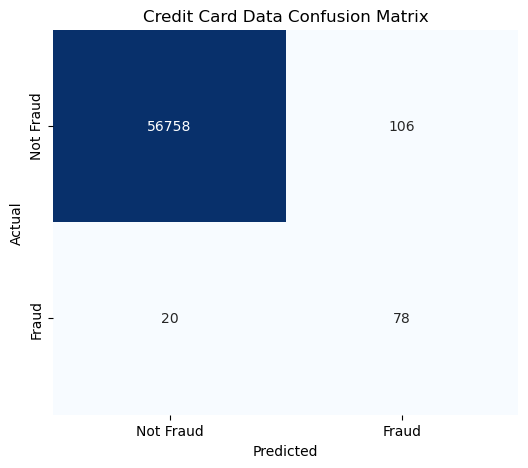

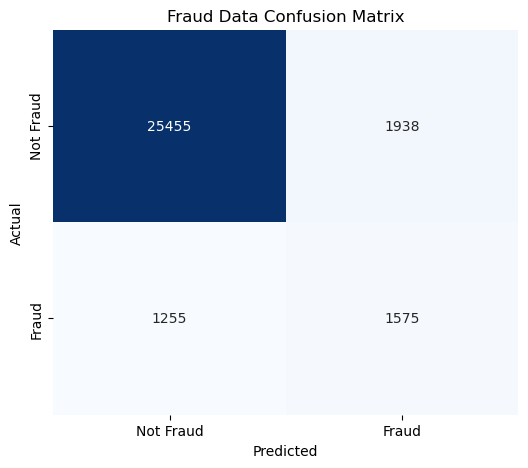

In [32]:
# Confusion Matrix for Credit Card Data
cm_creditcard = confusion_matrix(y_test_creditcard, y_pred_creditcard)

# Confusion Matrix for Fraud Data
cm_fraud = confusion_matrix(y_test_fraud, y_pred_fraud)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot for Credit Card Data
plot_confusion_matrix(cm_creditcard, title='Credit Card Data Confusion Matrix')

# Plot for Fraud Data
plot_confusion_matrix(cm_fraud, title='Fraud Data Confusion Matrix')


In [33]:
# Classification Report for Credit Card Data
print("Credit Card Data Classification Report:")
print(classification_report(y_test_creditcard, y_pred_creditcard))

# Classification Report for Fraud Data
print("\nFraud Data Classification Report:")
print(classification_report(y_test_fraud, y_pred_fraud))


Credit Card Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.42      0.80      0.55        98

    accuracy                           1.00     56962
   macro avg       0.71      0.90      0.78     56962
weighted avg       1.00      1.00      1.00     56962


Fraud Data Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     27393
           1       0.45      0.56      0.50      2830

    accuracy                           0.89     30223
   macro avg       0.70      0.74      0.72     30223
weighted avg       0.91      0.89      0.90     30223



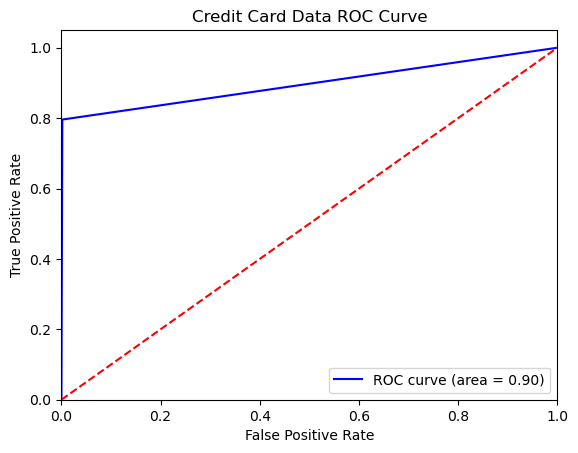

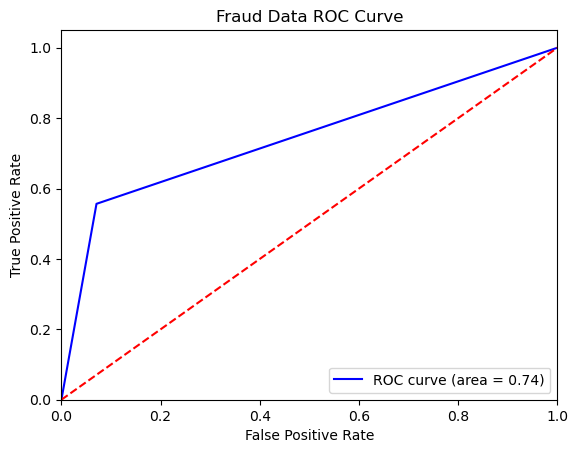

In [41]:
# ROC Curve and AUC
def plot_roc_curve(y_true, y_scores, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# Get predicted probabilities for ROC
y_scores_creditcard = dt_creditcard.predict_proba(X_test_creditcard)[:, 1]
y_scores_fraud = dt_fraud.predict_proba(X_test_fraud)[:, 1]

# Plot ROC Curve for Credit Card Data
plot_roc_curve(y_test_creditcard, y_scores_creditcard, title='Credit Card Data ROC Curve')

# Plot ROC Curve for Fraud Data
plot_roc_curve(y_test_fraud, y_scores_fraud, title='Fraud Data ROC Curve')



<Figure size 1000x600 with 0 Axes>

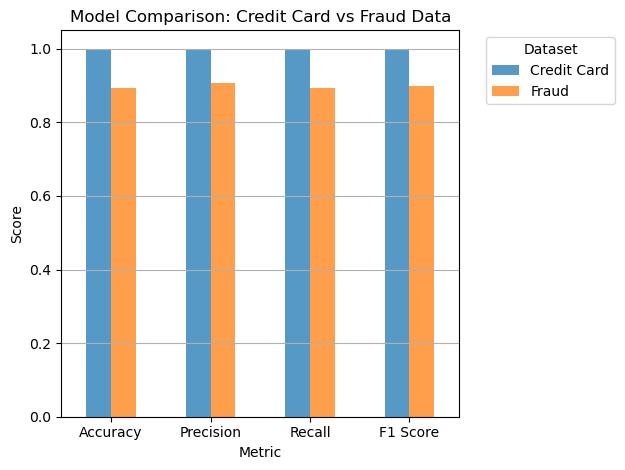

In [44]:
# Step 10: Model Comparison Plot
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Credit Card': [accuracy_creditcard, precision_creditcard, recall_creditcard, f1_creditcard],
    'Fraud': [accuracy_fraud, precision_fraud, recall_fraud, f1_fraud]
}

metrics_df = pd.DataFrame(metrics)

# Plotting
plt.figure(figsize=(10, 6))
ax = metrics_df.set_index('Metric').plot(kind='bar', alpha=0.75)

# Set the title and labels
plt.title('Model Comparison: Credit Card vs Fraud Data')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.grid(axis='y')

# Adjusting the legend position
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make space for the legend
plt.tight_layout()

plt.show()

### 3.1.2 Logistic Regression Model

In [45]:
# Fit Logistic Regression Model
lr_creditcard = LogisticRegression(max_iter=1000, random_state=42)
lr_creditcard.fit(X_train_creditcard_resampled, y_train_creditcard_resampled)

lr_fraud = LogisticRegression(max_iter=1000, random_state=42)
lr_fraud.fit(X_train_fraud_resampled, y_train_fraud_resampled)

# Predictions
y_pred_creditcard = lr_creditcard.predict(X_test_creditcard)
y_pred_fraud = lr_fraud.predict(X_test_fraud)

c:\Users\getac\anaconda3\envs\myenve\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
# Evaluation Metrics
accuracy_creditcard = accuracy_score(y_test_creditcard, y_pred_creditcard)
precision_creditcard = precision_score(y_test_creditcard, y_pred_creditcard, average='weighted')
recall_creditcard = recall_score(y_test_creditcard, y_pred_creditcard, average='weighted')
f1_creditcard = f1_score(y_test_creditcard, y_pred_creditcard, average='weighted')

accuracy_fraud = accuracy_score(y_test_fraud, y_pred_fraud)
precision_fraud = precision_score(y_test_fraud, y_pred_fraud, average='weighted')
recall_fraud = recall_score(y_test_fraud, y_pred_fraud, average='weighted')
f1_fraud = f1_score(y_test_fraud, y_pred_fraud, average='weighted')

# Classification Reports
classification_report_creditcard = classification_report(y_test_creditcard, y_pred_creditcard)
print("Classification Report for Credit Card Data:\n", classification_report_creditcard)

classification_report_fraud = classification_report(y_test_fraud, y_pred_fraud)
print("Classification Report for Fraud Data:\n", classification_report_fraud)

Classification Report for Credit Card Data:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.90      0.23        98

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962

Classification Report for Fraud Data:
               precision    recall  f1-score   support

           0       0.95      0.65      0.78     27393
           1       0.17      0.69      0.27      2830

    accuracy                           0.66     30223
   macro avg       0.56      0.67      0.52     30223
weighted avg       0.88      0.66      0.73     30223



In [48]:
# Display Metrics
print("Credit Card Data Metrics:")
print(f"Accuracy: {accuracy_creditcard:.4f}")
print(f"Weighted Precision: {precision_creditcard:.4f}")
print(f"Weighted Recall: {recall_creditcard:.4f}")
print(f"Weighted F1 Score: {f1_creditcard:.4f}")

print("\nFraud Data Metrics:")
print(f"Accuracy: {accuracy_fraud:.4f}")
print(f"Weighted Precision: {precision_fraud:.4f}")
print(f"Weighted Recall: {recall_fraud:.4f}")
print(f"Weighted F1 Score: {f1_fraud:.4f}")

Credit Card Data Metrics:
Accuracy: 0.9894
Weighted Precision: 0.9983
Weighted Recall: 0.9894
Weighted F1 Score: 0.9933

Fraud Data Metrics:
Accuracy: 0.6566
Weighted Precision: 0.8805
Weighted Recall: 0.6566
Weighted F1 Score: 0.7282


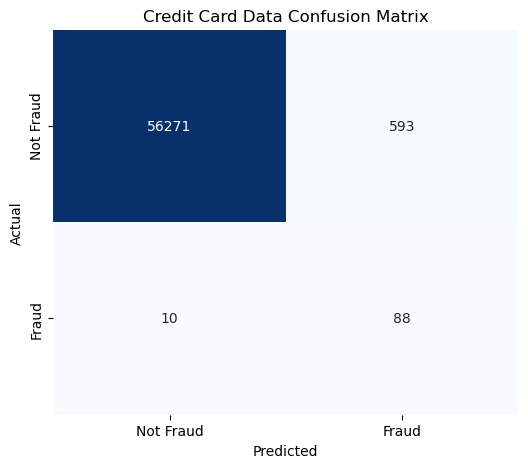

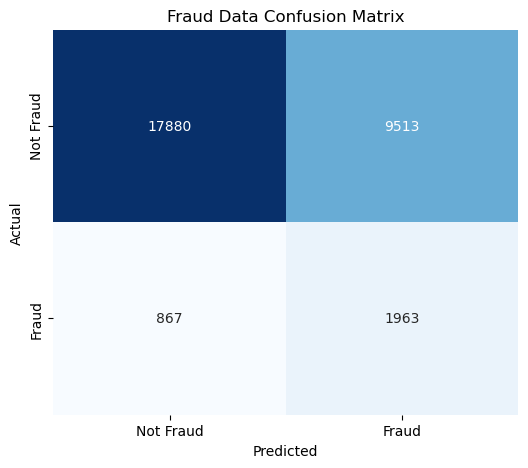

In [49]:
# Confusion Matrix and Plotting
cm_creditcard = confusion_matrix(y_test_creditcard, y_pred_creditcard)
cm_fraud = confusion_matrix(y_test_fraud, y_pred_fraud)

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot for Credit Card Data
plot_confusion_matrix(cm_creditcard, title='Credit Card Data Confusion Matrix')

# Plot for Fraud Data
plot_confusion_matrix(cm_fraud, title='Fraud Data Confusion Matrix')


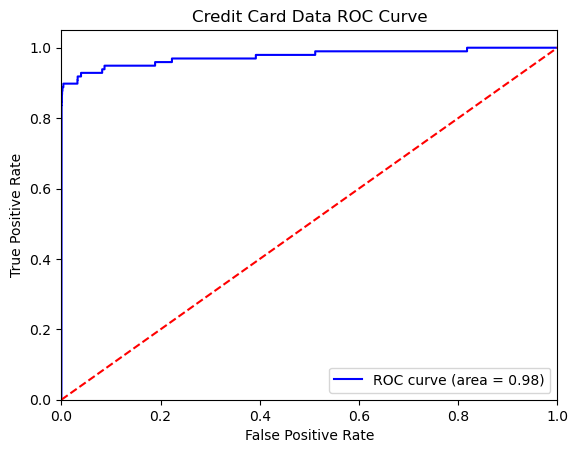

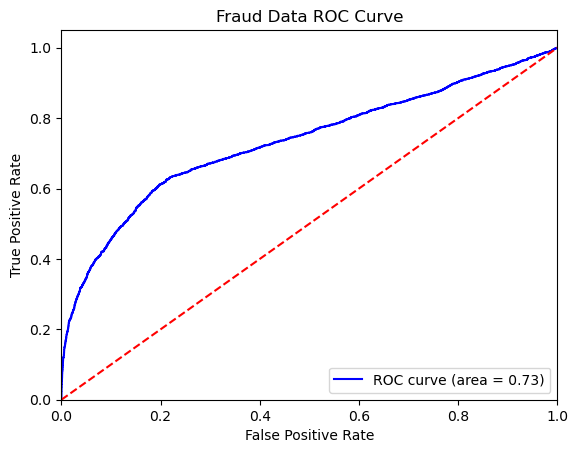

In [50]:
# ROC Curve and AUC
def plot_roc_curve(y_true, y_scores, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# Get predicted probabilities for ROC
y_scores_creditcard = lr_creditcard.predict_proba(X_test_creditcard)[:, 1]
y_scores_fraud = lr_fraud.predict_proba(X_test_fraud)[:, 1]

# Plot ROC Curve for Credit Card Data
plot_roc_curve(y_test_creditcard, y_scores_creditcard, title='Credit Card Data ROC Curve')

# Plot ROC Curve for Fraud Data
plot_roc_curve(y_test_fraud, y_scores_fraud, title='Fraud Data ROC Curve')


<Figure size 1000x600 with 0 Axes>

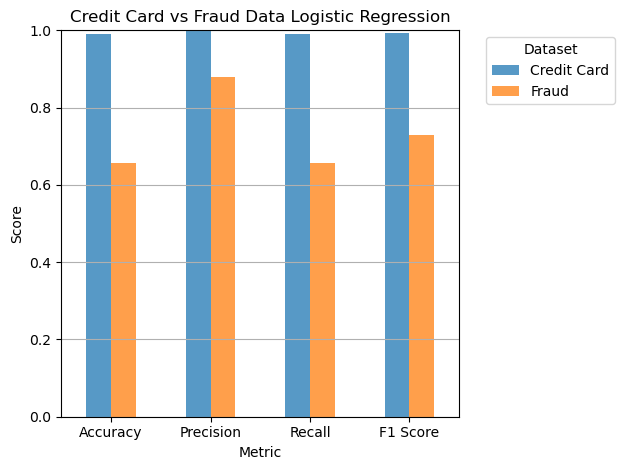

In [52]:
# Model Comparison Plot
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Credit Card': [accuracy_creditcard, precision_creditcard, recall_creditcard, f1_creditcard],
    'Fraud': [accuracy_fraud, precision_fraud, recall_fraud, f1_fraud]
}

metrics_df = pd.DataFrame(metrics)

# Plotting
plt.figure(figsize=(10, 6))
ax = metrics_df.set_index('Metric').plot(kind='bar', alpha=0.75)

# Set the title and labels
plt.title('Credit Card vs Fraud Data Logistic Regression')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')

# Adjusting the legend position
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make space for the legend
plt.tight_layout()

plt.show()

### 3.1.3 Random Forest Model

In [53]:
# Fit Random Forest Model
rf_creditcard = RandomForestClassifier(random_state=42)
rf_creditcard.fit(X_train_creditcard_resampled, y_train_creditcard_resampled)

rf_fraud = RandomForestClassifier(random_state=42)
rf_fraud.fit(X_train_fraud_resampled, y_train_fraud_resampled)

# Predictions
y_pred_creditcard = rf_creditcard.predict(X_test_creditcard)
y_pred_fraud = rf_fraud.predict(X_test_fraud)


In [54]:
# Evaluation Metrics
accuracy_creditcard = accuracy_score(y_test_creditcard, y_pred_creditcard)
precision_creditcard = precision_score(y_test_creditcard, y_pred_creditcard, average='weighted')
recall_creditcard = recall_score(y_test_creditcard, y_pred_creditcard, average='weighted')
f1_creditcard = f1_score(y_test_creditcard, y_pred_creditcard, average='weighted')

accuracy_fraud = accuracy_score(y_test_fraud, y_pred_fraud)
precision_fraud = precision_score(y_test_fraud, y_pred_fraud, average='weighted')
recall_fraud = recall_score(y_test_fraud, y_pred_fraud, average='weighted')
f1_fraud = f1_score(y_test_fraud, y_pred_fraud, average='weighted')

# Classification Reports
classification_report_creditcard = classification_report(y_test_creditcard, y_pred_creditcard)
print("Classification Report for Credit Card Data:\n", classification_report_creditcard)

classification_report_fraud = classification_report(y_test_fraud, y_pred_fraud)
print("Classification Report for Fraud Data:\n", classification_report_fraud)

Classification Report for Credit Card Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Classification Report for Fraud Data:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     27393
           1       0.98      0.53      0.69      2830

    accuracy                           0.96     30223
   macro avg       0.97      0.76      0.83     30223
weighted avg       0.96      0.96      0.95     30223



In [55]:
# Display Metrics
print("Credit Card Data Metrics:")
print(f"Accuracy: {accuracy_creditcard:.4f}")
print(f"Weighted Precision: {precision_creditcard:.4f}")
print(f"Weighted Recall: {recall_creditcard:.4f}")
print(f"Weighted F1 Score: {f1_creditcard:.4f}")

print("\nFraud Data Metrics:")
print(f"Accuracy: {accuracy_fraud:.4f}")
print(f"Weighted Precision: {precision_fraud:.4f}")
print(f"Weighted Recall: {recall_fraud:.4f}")
print(f"Weighted F1 Score: {f1_fraud:.4f}")

Credit Card Data Metrics:
Accuracy: 0.9994
Weighted Precision: 0.9994
Weighted Recall: 0.9994
Weighted F1 Score: 0.9994

Fraud Data Metrics:
Accuracy: 0.9550
Weighted Precision: 0.9564
Weighted Recall: 0.9550
Weighted F1 Score: 0.9487


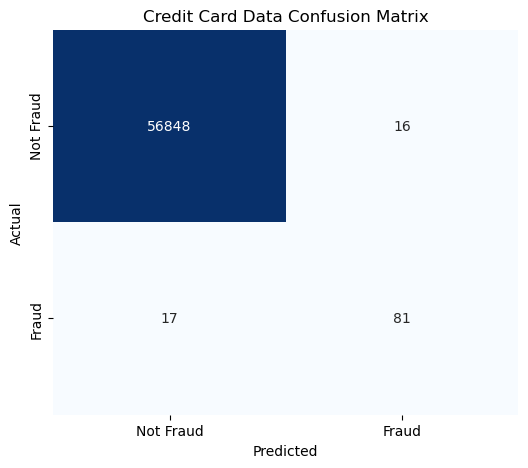

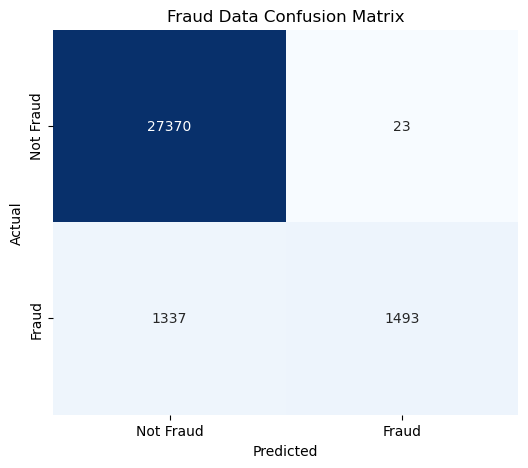

In [56]:
# Confusion Matrix and Plotting
cm_creditcard = confusion_matrix(y_test_creditcard, y_pred_creditcard)
cm_fraud = confusion_matrix(y_test_fraud, y_pred_fraud)

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot for Credit Card Data
plot_confusion_matrix(cm_creditcard, title='Credit Card Data Confusion Matrix')

# Plot for Fraud Data
plot_confusion_matrix(cm_fraud, title='Fraud Data Confusion Matrix')

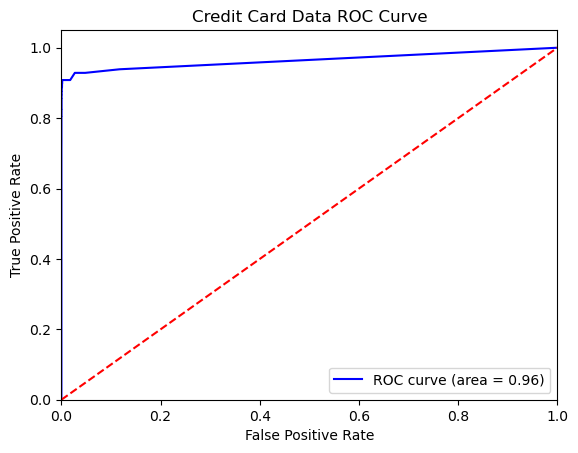

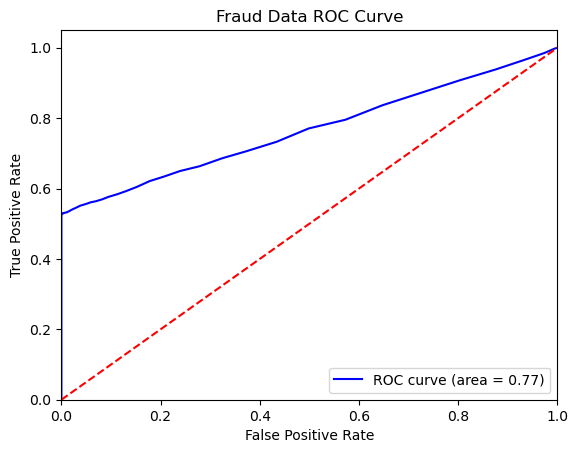

In [57]:
# ROC Curve and AUC
def plot_roc_curve(y_true, y_scores, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# Get predicted probabilities for ROC
y_scores_creditcard = rf_creditcard.predict_proba(X_test_creditcard)[:, 1]
y_scores_fraud = rf_fraud.predict_proba(X_test_fraud)[:, 1]

# Plot ROC Curve for Credit Card Data
plot_roc_curve(y_test_creditcard, y_scores_creditcard, title='Credit Card Data ROC Curve')

# Plot ROC Curve for Fraud Data
plot_roc_curve(y_test_fraud, y_scores_fraud, title='Fraud Data ROC Curve')


<Figure size 1000x600 with 0 Axes>

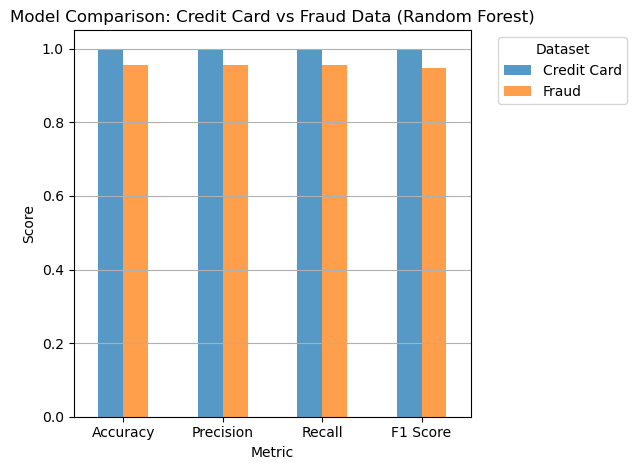

In [59]:
# Model Comparison Plot
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Credit Card': [accuracy_creditcard, precision_creditcard, recall_creditcard, f1_creditcard],
    'Fraud': [accuracy_fraud, precision_fraud, recall_fraud, f1_fraud]
}

metrics_df = pd.DataFrame(metrics)

# Plotting
plt.figure(figsize=(10, 6))
ax = metrics_df.set_index('Metric').plot(kind='bar', alpha=0.75)

# Set the title and labels
plt.title('Model Comparison: Credit Card vs Fraud Data (Random Forest)')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.grid(axis='y')

# Adjusting the legend position
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make space for the legend
plt.tight_layout()

plt.show()

### 3.1.3 XGBoost Model

In [60]:
# Fit XGBoost Model
from xgboost import XGBClassifier
xgb_creditcard = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_creditcard.fit(X_train_creditcard_resampled, y_train_creditcard_resampled)

xgb_fraud = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_fraud.fit(X_train_fraud_resampled, y_train_fraud_resampled)

# Predictions
y_pred_creditcard = xgb_creditcard.predict(X_test_creditcard)
y_pred_fraud = xgb_fraud.predict(X_test_fraud)

# Evaluation Metrics
accuracy_creditcard = accuracy_score(y_test_creditcard, y_pred_creditcard)
precision_creditcard = precision_score(y_test_creditcard, y_pred_creditcard, average='weighted')
recall_creditcard = recall_score(y_test_creditcard, y_pred_creditcard, average='weighted')
f1_creditcard = f1_score(y_test_creditcard, y_pred_creditcard, average='weighted')

accuracy_fraud = accuracy_score(y_test_fraud, y_pred_fraud)
precision_fraud = precision_score(y_test_fraud, y_pred_fraud, average='weighted')
recall_fraud = recall_score(y_test_fraud, y_pred_fraud, average='weighted')
f1_fraud = f1_score(y_test_fraud, y_pred_fraud, average='weighted')

# Classification Reports
classification_report_creditcard = classification_report(y_test_creditcard, y_pred_creditcard)
print("Classification Report for Credit Card Data:\n", classification_report_creditcard)

classification_report_fraud = classification_report(y_test_fraud, y_pred_fraud)
print("Classification Report for Fraud Data:\n", classification_report_fraud)


Classification Report for Credit Card Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.85      0.82        98

    accuracy                           1.00     56962
   macro avg       0.90      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Classification Report for Fraud Data:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     27393
           1       0.98      0.53      0.69      2830

    accuracy                           0.95     30223
   macro avg       0.96      0.76      0.83     30223
weighted avg       0.96      0.95      0.95     30223



Credit Card Data Metrics:
Accuracy: 0.9994
Weighted Precision: 0.9994
Weighted Recall: 0.9994
Weighted F1 Score: 0.9994

Fraud Data Metrics:
Accuracy: 0.9546
Weighted Precision: 0.9556
Weighted Recall: 0.9546
Weighted F1 Score: 0.9484


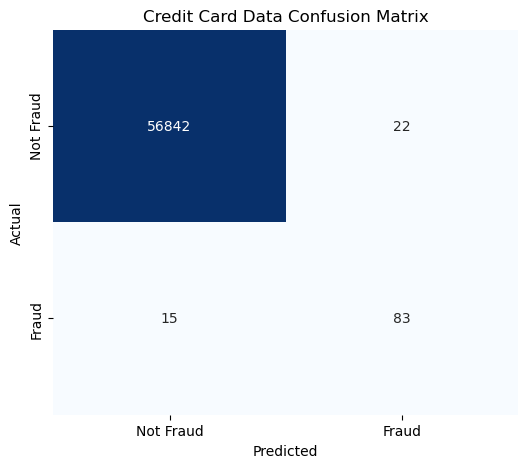

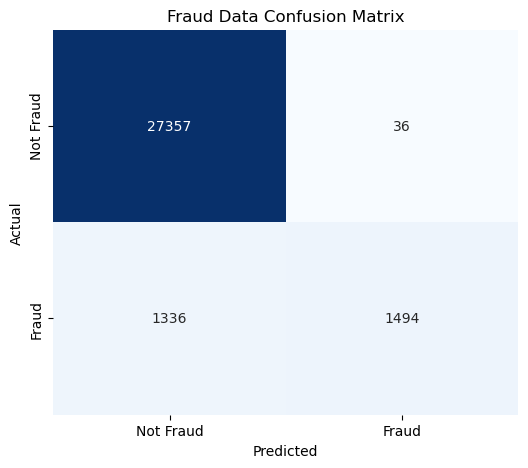

In [61]:
# Display Metrics
print("Credit Card Data Metrics:")
print(f"Accuracy: {accuracy_creditcard:.4f}")
print(f"Weighted Precision: {precision_creditcard:.4f}")
print(f"Weighted Recall: {recall_creditcard:.4f}")
print(f"Weighted F1 Score: {f1_creditcard:.4f}")

print("\nFraud Data Metrics:")
print(f"Accuracy: {accuracy_fraud:.4f}")
print(f"Weighted Precision: {precision_fraud:.4f}")
print(f"Weighted Recall: {recall_fraud:.4f}")
print(f"Weighted F1 Score: {f1_fraud:.4f}")

# Confusion Matrix and Plotting
cm_creditcard = confusion_matrix(y_test_creditcard, y_pred_creditcard)
cm_fraud = confusion_matrix(y_test_fraud, y_pred_fraud)

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot for Credit Card Data
plot_confusion_matrix(cm_creditcard, title='Credit Card Data Confusion Matrix')

# Plot for Fraud Data
plot_confusion_matrix(cm_fraud, title='Fraud Data Confusion Matrix')

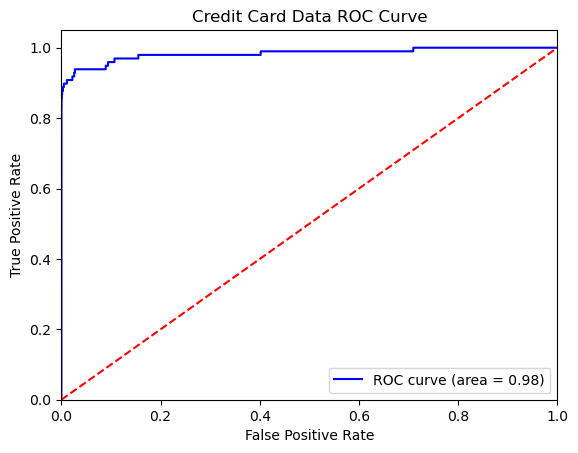

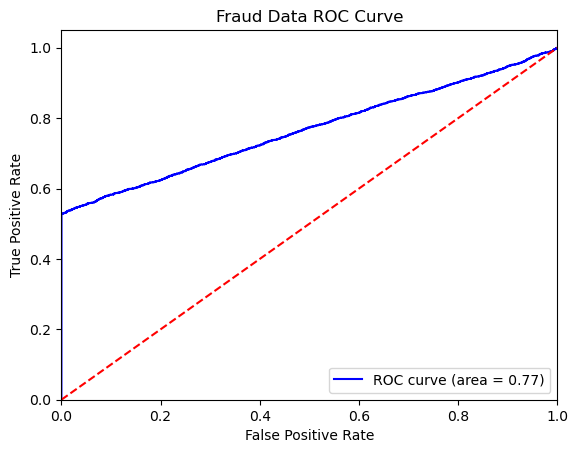

<Figure size 1000x600 with 0 Axes>

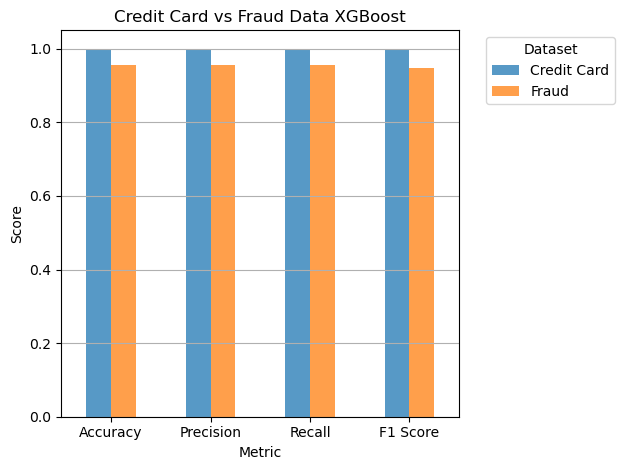

In [64]:
# ROC Curve and AUC
def plot_roc_curve(y_true, y_scores, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# Get predicted probabilities for ROC
y_scores_creditcard = xgb_creditcard.predict_proba(X_test_creditcard)[:, 1]
y_scores_fraud = xgb_fraud.predict_proba(X_test_fraud)[:, 1]

# Plot ROC Curve for Credit Card Data
plot_roc_curve(y_test_creditcard, y_scores_creditcard, title='Credit Card Data ROC Curve')

# Plot ROC Curve for Fraud Data
plot_roc_curve(y_test_fraud, y_scores_fraud, title='Fraud Data ROC Curve')

# Step 10: Model Comparison Plot
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Credit Card': [accuracy_creditcard, precision_creditcard, recall_creditcard, f1_creditcard],
    'Fraud': [accuracy_fraud, precision_fraud, recall_fraud, f1_fraud]
}

metrics_df = pd.DataFrame(metrics)

# Plotting
plt.figure(figsize=(10, 6))
ax = metrics_df.set_index('Metric').plot(kind='bar', alpha=0.75)

# Set the title and labels
plt.title('Credit Card vs Fraud Data XGBoost')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.grid(axis='y')

# Adjusting the legend position
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make space for the legend
plt.tight_layout()

plt.show()

### 3.1.5 Multi-Layer Perceptron (MLP)

In [65]:
from sklearn.neural_network import MLPClassifier
# Fit MLP Model
mlp_creditcard = MLPClassifier(random_state=42, max_iter=500)
mlp_creditcard.fit(X_train_creditcard_resampled, y_train_creditcard_resampled)

mlp_fraud = MLPClassifier(random_state=42, max_iter=500)
mlp_fraud.fit(X_train_fraud_resampled, y_train_fraud_resampled)

# Predictions
y_pred_creditcard = mlp_creditcard.predict(X_test_creditcard)
y_pred_fraud = mlp_fraud.predict(X_test_fraud)

In [ ]:
# Evaluation Metrics
accuracy_creditcard = accuracy_score(y_test_creditcard, y_pred_creditcard)
precision_creditcard = precision_score(y_test_creditcard, y_pred_creditcard, average='weighted')
recall_creditcard = recall_score(y_test_creditcard, y_pred_creditcard, average='weighted')
f1_creditcard = f1_score(y_test_creditcard, y_pred_creditcard, average='weighted')

accuracy_fraud = accuracy_score(y_test_fraud, y_pred_fraud)
precision_fraud = precision_score(y_test_fraud, y_pred_fraud, average='weighted')
recall_fraud = recall_score(y_test_fraud, y_pred_fraud, average='weighted')
f1_fraud = f1_score(y_test_fraud, y_pred_fraud, average='weighted')

# Classification Reports
classification_report_creditcard = classification_report(y_test_creditcard, y_pred_creditcard)
print("Classification Report for Credit Card Data:\n", classification_report_creditcard)

classification_report_fraud = classification_report(y_test_fraud, y_pred_fraud)
print("Classification Report for Fraud Data:\n", classification_report_fraud)


Credit Card Data Metrics:
Accuracy: 0.9994
Weighted Precision: 0.9994
Weighted Recall: 0.9994
Weighted F1 Score: 0.9994

Fraud Data Metrics:
Accuracy: 0.9546
Weighted Precision: 0.9556
Weighted Recall: 0.9546
Weighted F1 Score: 0.9484


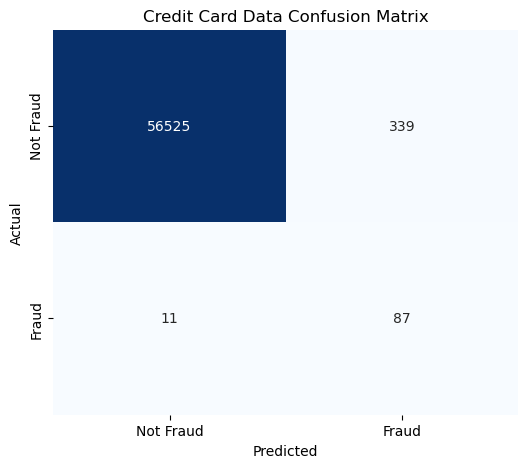

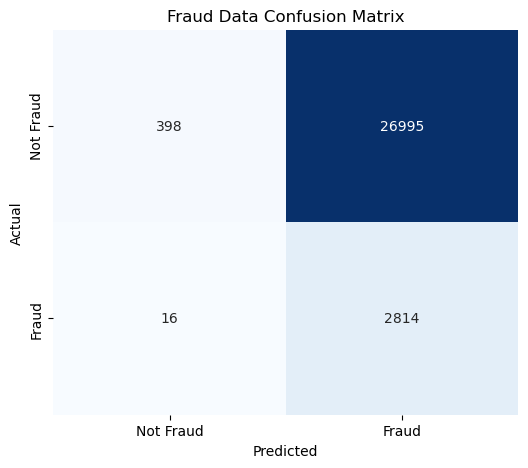

In [66]:
# Display Metrics
print("Credit Card Data Metrics:")
print(f"Accuracy: {accuracy_creditcard:.4f}")
print(f"Weighted Precision: {precision_creditcard:.4f}")
print(f"Weighted Recall: {recall_creditcard:.4f}")
print(f"Weighted F1 Score: {f1_creditcard:.4f}")

print("\nFraud Data Metrics:")
print(f"Accuracy: {accuracy_fraud:.4f}")
print(f"Weighted Precision: {precision_fraud:.4f}")
print(f"Weighted Recall: {recall_fraud:.4f}")
print(f"Weighted F1 Score: {f1_fraud:.4f}")

# Confusion Matrix and Plotting
cm_creditcard = confusion_matrix(y_test_creditcard, y_pred_creditcard)
cm_fraud = confusion_matrix(y_test_fraud, y_pred_fraud)

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot for Credit Card Data
plot_confusion_matrix(cm_creditcard, title='Credit Card Data Confusion Matrix')

# Plot for Fraud Data
plot_confusion_matrix(cm_fraud, title='Fraud Data Confusion Matrix')


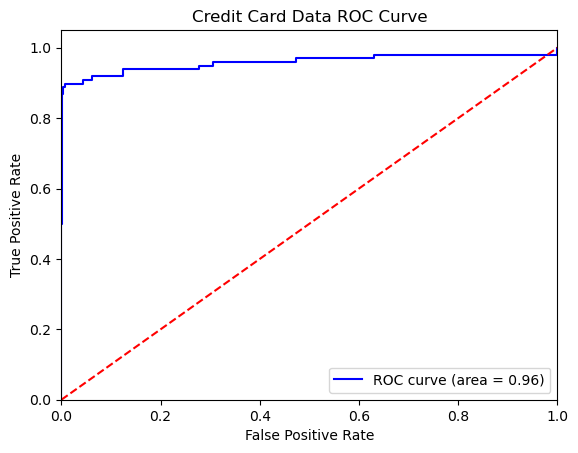

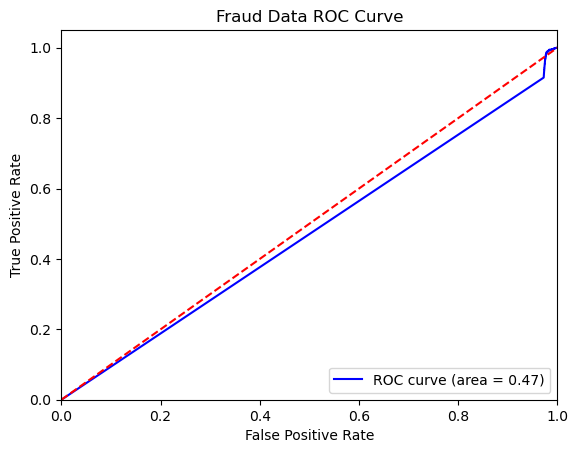

<Figure size 1000x600 with 0 Axes>

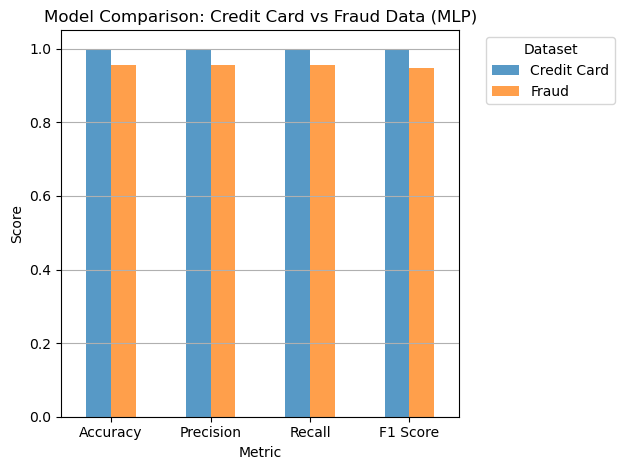

In [67]:
# ROC Curve and AUC
def plot_roc_curve(y_true, y_scores, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# Get predicted probabilities for ROC
y_scores_creditcard = mlp_creditcard.predict_proba(X_test_creditcard)[:, 1]
y_scores_fraud = mlp_fraud.predict_proba(X_test_fraud)[:, 1]

# Plot ROC Curve for Credit Card Data
plot_roc_curve(y_test_creditcard, y_scores_creditcard, title='Credit Card Data ROC Curve')

# Plot ROC Curve for Fraud Data
plot_roc_curve(y_test_fraud, y_scores_fraud, title='Fraud Data ROC Curve')

# Step 10: Model Comparison Plot
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Credit Card': [accuracy_creditcard, precision_creditcard, recall_creditcard, f1_creditcard],
    'Fraud': [accuracy_fraud, precision_fraud, recall_fraud, f1_fraud]
}

metrics_df = pd.DataFrame(metrics)

# Plotting
plt.figure(figsize=(10, 6))
ax = metrics_df.set_index('Metric').plot(kind='bar', alpha=0.75)

# Set the title and labels
plt.title('Model Comparison: Credit Card vs Fraud Data (MLP)')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.grid(axis='y')

# Adjusting the legend position
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make space for the legend
plt.tight_layout()

plt.show()